## CYP P450 - 2C19

__Autores: João José Lopes Cheixo (PG49837), Márcia Filipa Gonçalves Oliveira (PG49841), Mariana Rochinha Braguês (PG49843)__

### Análise do conjunto de dados e sua breve descrição

O presente trabalho realiza-se no âmbito da unidade curricular Extração de Conhecimento de Dados Biológicos, do Mestrado em Bioinformática. Tem como principal objetivo a análise de um conjunto de dados de atividades de compostos químicos, caracterizados por um conjunto de variáveis representando descritores químicos calculados para cada composto, bem como variáveis de metadados representando alguma atividade ou propriedade das moléculas, usando a linguagem de programação python.  
Os genes CYP P450 estão envolvidos no metabolismo de várias moléculas e produtos químicos dentro das células [1].
O CYP P450 2C9 é uma enzima encontrada no fígado e está envolvida no metabolismo de medicamentos, como anticoagulantes, anticonvulsivantes. A inibição desta enzima pode levar a uma diminuição no metabolismo e na depuração destes medicamentos, o que pode resultar em aumento da toxicidade e de efeitos adversos [1].
O citocromo P450 - 2C19 corresponde a uma das causas principais ou parciais das diferenças na farmacocinética de vários medicamentos clinicamente relevantes. Com base na sua capacidade de metabolizar a (S)-mefenitoína e outros substratos CYP2C19, os indivíduos podem ser classificados como metabolizadores extensos ou metabolizadores fracos [2]. 

#### Importação de packages e dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from rdkit import Chem
from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

Carregamento dos dados necessários para a execução do trabalho:

In [2]:
cyp2c19_dados = pd.read_csv('cyp2c19.csv')    #dados
print(cyp2c19_dados)

              ids                                             smiles  Y
0       6602638.0             CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1.Cl  0
1        644675.0         CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1  1
2        644851.0                   Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1  1
3        644890.0    COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1  1
4        644968.0               COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1  1
...           ...                                                ... ..
12508  16758814.0  CCN1C(=O)[C@@H]2[C@@H](CC[C@@H]3C(=O)C=C[C@@H]...  0
12509  16758816.0  O=C1[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@H]4C3...  0
12510  16758817.0  CCN1C(=O)[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@...  1
12511  16758818.0  C[C@H](c1ccccc1)N1C(=O)[C@@H]2[C@@H](CC[C@@H]3...  0
12512  10847630.0                        COC(=O)NC/C=C\c1nc(CCCO)co1  0

[12513 rows x 3 columns]


In [3]:
features = pd.read_csv('cyp2c19_features.csv')     #features
print(features)

       MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0           11.609395        0.000000          11.609395           0.000000   
1           12.610409       -3.973681          12.610409           0.072387   
2            6.126257        0.660427           6.126257           0.660427   
3            5.719940       -0.219974           5.719940           0.075509   
4           12.040634       -0.208718          12.040634           0.006714   
...               ...             ...                ...                ...   
12508       12.346902       -0.801800          12.346902           0.024123   
12509       13.390758       -1.019880          13.390758           0.162294   
12510       12.817440       -0.985371          12.817440           0.131139   
12511       13.179767       -1.161112          13.179767           0.077392   
12512       10.715530       -0.480844          10.715530           0.139962   

            qed    MolWt  HeavyAtomMolWt  ExactMolW

Análise dos dados:

In [4]:
print("Nome das linhas dos dados: ", cyp2c19_dados.index)


Nome das linhas dos dados:  RangeIndex(start=0, stop=12513, step=1)


In [5]:
print("Nome das colunas dos dados: ", cyp2c19_dados.columns)

Nome das colunas dos dados:  Index(['ids', 'smiles', 'Y'], dtype='object')


In [6]:
print("Tipos de dados em cada coluna: ", cyp2c19_dados.dtypes)

Tipos de dados em cada coluna:  ids       float64
smiles     object
Y           int64
dtype: object


In [7]:
print("Dimensão dos dados: ", cyp2c19_dados.shape)  

Dimensão dos dados:  (12513, 3)


Este conjunto de dados tem 12513 linhas e 3 colunas.

Exemplo da primeira estrutura do composto químico:

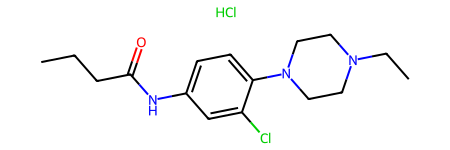

In [8]:
smiles = cyp2c19_dados.loc[0,'smiles']
mol = Chem.MolFromSmiles(smiles)
mol

Análise das features:

In [9]:
print("Nome das linhas das features: ", features.index)

Nome das linhas das features:  RangeIndex(start=0, stop=12513, step=1)


In [10]:
print("Nome das colunas das features: ", features.columns)

Nome das colunas das features:  Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'NumRadicalElectrons',
       ...
       'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
       'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene',
       'fr_unbrch_alkane', 'fr_urea'],
      dtype='object', length=208)


In [11]:
print("Tipos de dados em cada coluna: ", features.dtypes)

Tipos de dados em cada coluna:  MaxEStateIndex       float64
MinEStateIndex       float64
MaxAbsEStateIndex    float64
MinAbsEStateIndex    float64
qed                  float64
                      ...   
fr_thiazole          float64
fr_thiocyan          float64
fr_thiophene         float64
fr_unbrch_alkane     float64
fr_urea              float64
Length: 208, dtype: object


In [12]:
print("Dimensão das features: ", features.shape)

Dimensão das features:  (12513, 208)


O conjunto de features tem 12513 linhas e 208 colunas.

### Tarefas de pré-processamento dos dados

Tratamento de valores omissos:

In [13]:
cyp2c19_dados.isnull()

,ids,smiles,Y
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
12508,False,False,False
12509,False,False,False
12510,False,False,False
12511,False,False,False


In [52]:
print(cyp2c19_dados.isnull().sum()) #soma de NAs em cada coluna 

ids       0
smiles    0
Y         0
dtype: int64


Os nossos dados não apresentam valores omissos (NAs), pelo que, não é necessário proceder à sua remoção.

Tratamento de valores omissos para as features:

In [15]:
features.isnull()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12510,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12511,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
print(features.isnull().sum()) #soma de NAs em cada coluna

MaxEStateIndex       0
MinEStateIndex       0
MaxAbsEStateIndex    0
MinAbsEStateIndex    0
qed                  0
                    ..
fr_thiazole          0
fr_thiocyan          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 208, dtype: int64


As features não apresentam valores omissos (NAs), pelo que, não é necessário proceder à sua remoção.

Remoção de colunas de features que apresentam mais de 10 linhas com valores zero:

In [54]:
# verifica quantas linhas de cada coluna contêm apenas zeros
zero_counts = features.apply(lambda col: sum(col == 0), axis=0)

# seleciona as colunas que têm menos de 10 linhas de zeros
cols_to_keep = zero_counts[zero_counts <= 10].index.tolist()

# cria um novo DataFrame sem as colunas com mais de 10 zeros
features_filtered = features.loc[:, cols_to_keep]

print(features_filtered)

       MaxEStateIndex  MaxAbsEStateIndex       qed    MolWt  HeavyAtomMolWt  \
0           11.609395          11.609395  0.884168  346.302         321.102   
1           12.610409          12.610409  0.720978  355.418         346.346   
2            6.126257           6.126257  0.756902  255.708         245.628   
3            5.719940           5.719940  0.605920  421.549         390.301   
4           12.040634          12.040634  0.728361  324.344         308.216   
...               ...                ...       ...      ...             ...   
12508       12.346902          12.346902  0.682518  263.293         246.157   
12509       13.390758          13.390758  0.455270  397.427         374.243   
12510       12.817440          12.817440  0.406549  335.356         314.188   
12511       13.179767          13.179767  0.772281  357.406         334.222   
12512       10.715530          10.715530  0.773508  240.259         224.131   

       ExactMolWt  NumValenceElectrons  MaxPartialC

Após esta remoção, o conjunto de features ficou com 12513 linhas e 44 colunas.

Standardização:

In [55]:
# normalização dos dados
cols = features_filtered.columns
features_scaled = preprocessing.scale(features_filtered)

# cria um novo dataframe com as colunas normalizadas
features_scaled = pd.DataFrame(features_scaled, columns=cols)


c:\Users\Mariana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [57]:
print('A média dos valores standardizados é ', features_scaled.mean())

A média dos valores standardizados é  MaxEStateIndex        -9.085498e-18
MaxAbsEStateIndex     -9.085498e-18
qed                   -7.268398e-17
MolWt                 -1.817100e-17
HeavyAtomMolWt        -3.634199e-17
ExactMolWt             3.634199e-17
NumValenceElectrons   -2.725649e-17
MaxPartialCharge      -1.817100e-17
MinPartialCharge       2.044237e-17
MaxAbsPartialCharge    2.271375e-17
MinAbsPartialCharge    0.000000e+00
FpDensityMorgan1       1.135687e-17
FpDensityMorgan2       0.000000e+00
FpDensityMorgan3      -2.952787e-17
BCUT2D_MWHI            0.000000e+00
BCUT2D_MWLOW          -7.949811e-18
BCUT2D_CHGHI           1.817100e-17
BCUT2D_CHGLO          -1.817100e-17
BCUT2D_LOGPHI          0.000000e+00
BCUT2D_LOGPLOW         1.362825e-17
BCUT2D_MRHI            1.817100e-17
BCUT2D_MRLOW          -1.817100e-17
BertzCT               -2.725649e-17
Chi0                   9.085498e-18
Chi0n                  1.817100e-17
Chi0v                  0.000000e+00
Chi1                   0.0

In [58]:
print('O desvio padrão dos valores standardizados é ', features_scaled.std())

O desvio padrão dos valores standardizados é  MaxEStateIndex         1.00004
MaxAbsEStateIndex      1.00004
qed                    1.00004
MolWt                  1.00004
HeavyAtomMolWt         1.00004
ExactMolWt             1.00004
NumValenceElectrons    1.00004
MaxPartialCharge       1.00004
MinPartialCharge       1.00004
MaxAbsPartialCharge    1.00004
MinAbsPartialCharge    1.00004
FpDensityMorgan1       1.00004
FpDensityMorgan2       1.00004
FpDensityMorgan3       1.00004
BCUT2D_MWHI            1.00004
BCUT2D_MWLOW           1.00004
BCUT2D_CHGHI           1.00004
BCUT2D_CHGLO           1.00004
BCUT2D_LOGPHI          1.00004
BCUT2D_LOGPLOW         1.00004
BCUT2D_MRHI            1.00004
BCUT2D_MRLOW           1.00004
BertzCT                1.00004
Chi0                   1.00004
Chi0n                  1.00004
Chi0v                  1.00004
Chi1                   1.00004
Chi1n                  1.00004
Chi1v                  1.00004
Chi2n                  1.00004
Chi2v                  1

Conseguimos avaliar que a standardização foi realizada corretamente, uma vez que a média e o desvio padrão dos dados standardizados estão próximos de zero e um, respetivamente.

Boxplot com os dados standardizados:

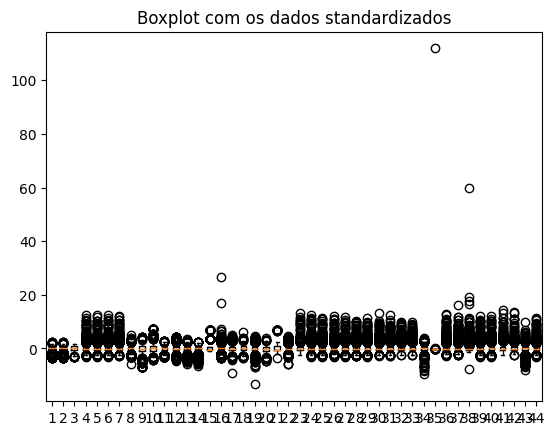

In [59]:
plt.boxplot(features_scaled)
plt.title("Boxplot com os dados standardizados")
plt.show()

Concatenar a coluna Y do dataframe dos dados ao dataframe das features:

In [60]:
#Concatenar a coluna Y ao dataframe das features
df_concat = pd.concat([features_scaled, cyp2c19_dados['Y']], axis=1)
df_concat

,MaxEStateIndex,MaxAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,...,Kappa1,Kappa2,Kappa3,LabuteASA,HeavyAtomCount,NOCount,NumHeteroatoms,MolLogP,MolMR,Y
0,0.115772,0.115772,1.424047,-0.088940,-0.144042,-0.096301,-0.174867,-0.518022,0.620632,-0.677710,...,0.324918,0.722735,0.478511,-0.109161,-0.405263,-0.690578,-0.219338,0.352703,0.014999,0
1,0.492002,0.492002,0.566468,-0.002316,0.109556,-0.002822,-0.428702,1.538189,0.065702,-0.107864,...,-0.427667,-0.758748,-0.610749,-0.362360,-0.405263,0.142229,0.941815,-0.200129,-0.397864,1
2,-1.945057,-1.945057,0.755253,-0.949804,-0.902243,-0.953213,-1.088674,-1.031214,1.930944,-2.023243,...,-1.148551,-1.031799,-0.807720,-0.903432,-0.941472,-1.106981,-0.993440,0.436821,-0.854457,1
3,-2.097771,-2.097771,-0.038172,0.626090,0.551122,0.627817,0.840474,-1.124549,-0.923614,0.908043,...,0.746935,0.677573,0.355367,0.808579,0.801207,0.975035,0.554764,-0.154589,0.808325,1
4,0.277853,0.277853,0.605268,-0.297594,-0.273493,-0.296105,-0.225634,-0.283465,-0.923697,0.908129,...,-0.308597,-0.007029,-0.080192,-0.241839,-0.137159,0.975035,0.554764,-1.097295,-0.366989,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12508,0.392963,0.392963,0.364361,-0.877728,-0.896929,-0.876546,-0.733304,-0.408616,0.369372,-0.419697,...,-0.866145,-1.168269,-0.975228,-0.872185,-0.807420,-0.274174,-0.606389,-1.617615,-1.087847,0
12509,0.785295,0.785295,-0.829850,0.396872,0.389806,0.398500,0.535872,-0.401001,0.357852,-0.407867,...,0.086585,-0.425198,-0.645561,0.446816,0.533102,0.558632,0.167713,-1.125878,0.105311,0
12510,0.569814,0.569814,-1.085881,-0.192954,-0.213499,-0.191434,-0.022566,-0.404934,0.357852,-0.407867,...,-0.415569,-0.935297,-0.953753,-0.217662,-0.137159,0.558632,0.167713,-1.788658,-0.596157,1
12511,0.705994,0.705994,0.836072,0.016575,-0.012240,0.018042,0.180502,-0.401750,0.352742,-0.402620,...,0.013528,-0.400300,-0.626344,0.066698,0.130945,0.142229,-0.219338,-1.091961,-0.164728,0


Pela análise gráfica do boxplot acima representado consegue-se perceber que existem variados valores outliers que necessitam de ser removidos. Para isso, vamos aplicar a função z-score:

In [62]:
z = np.abs(stats.zscore(df_concat))
outliers = np.where(z > 1.5)
print(outliers) #quais os valores outliers a ser removidos
mask = (z <= 1.5).all(axis=1)
data_sem_outliers = df_concat[mask]

#Remoção dos valores que estejam acima de 1.5 desvio-padrão da média

(array([    0,     1,     1, ..., 12512, 12512, 12512], dtype=int64), array([33,  7, 10, ..., 16, 17, 18], dtype=int64))


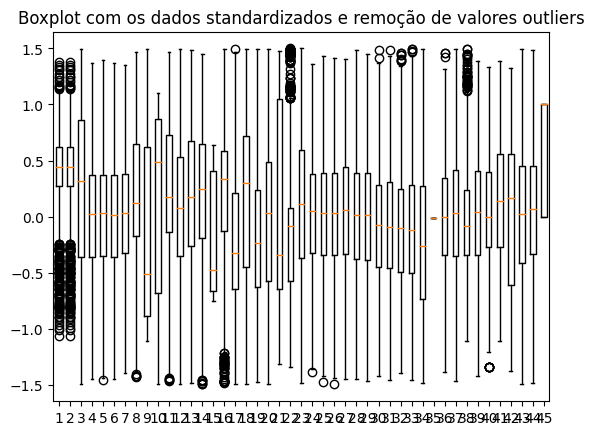

In [63]:
plt.boxplot(data_sem_outliers)
plt.title("Boxplot com os dados standardizados e remoção de valores outliers")
plt.show()

In [64]:
data_sem_outliers.shape #dimensão dos dados após remoção dos outliers

(3707, 45)

Após este pré-tratamento, o conjunto de features ficou com 3707 linhas e 45 colunas.

Dados finais:

In [65]:
features_final = data_sem_outliers
print(features_final)

       MaxEStateIndex  MaxAbsEStateIndex       qed     MolWt  HeavyAtomMolWt  \
4            0.277853           0.277853  0.605268 -0.297594       -0.273493   
5            0.549106           0.549106  0.755962  0.235530        0.209111   
10           0.533814           0.533814  0.252177  0.425836        0.369794   
12           0.437577           0.437577  0.861631 -0.392410       -0.353478   
14           0.379337           0.379337  0.430598  0.711849        0.651912   
...               ...                ...       ...       ...             ...   
12279        0.106616           0.106616  1.330423 -1.039146       -1.077704   
12280        0.130172           0.130172  0.225339 -1.030175       -1.017590   
12291        0.242126           0.242126  0.399121 -0.810907       -0.876917   
12296       -0.089751          -0.089751  1.299874 -1.048496       -1.097715   
12297       -0.026389          -0.026389  1.147942 -0.344536       -0.373750   

       ExactMolWt  NumValenceElectrons 

### Sumarização dos dados (estatística descritiva, exploração com recurso a gráficos)

Descrição da distribuição dos dados, através do cálculo do número de valores não nulos, média, desvio padrão, valor mínimo, primeiro quartil, segundo quartil (mediana), terceiro quartil e valor máximo:

In [66]:
cyp2c19_dados.describe()   #dados

,ids,Y
count,1.251300e+04,12513.000000
mean,6.134883e+06,0.463838
std,1.787283e+07,0.498710
min,1.080000e+02,0.000000
25%,1.324253e+06,0.000000
50%,3.233964e+06,0.000000
75%,4.004272e+06,1.000000
max,1.460310e+08,1.000000


In [68]:
features_final.describe()   #features

,MaxEStateIndex,MaxAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,...,Kappa1,Kappa2,Kappa3,LabuteASA,HeavyAtomCount,NOCount,NumHeteroatoms,MolLogP,MolMR,Y
count,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,...,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000
mean,0.420721,0.420721,0.235610,-0.004558,0.001337,-0.004302,0.007837,0.166237,-0.149488,0.117453,...,-0.009092,0.032330,-0.032228,0.022617,0.034719,0.094264,0.033545,0.008789,0.043276,0.540059
std,0.302330,0.302330,0.749870,0.523822,0.530553,0.523604,0.510842,0.533741,0.790603,0.804999,...,0.497481,0.558292,0.439430,0.533368,0.530650,0.613850,0.635715,0.630392,0.560249,0.498460
min,-1.065660,-1.065660,-1.496012,-1.448368,-1.459698,-1.447506,-1.393276,-1.431000,-1.109293,-1.497920,...,-1.382405,-1.466509,-1.106040,-1.420763,-1.343629,-1.106981,-1.380492,-1.491370,-1.484684,0.000000
25%,0.273584,0.273584,-0.364119,-0.364240,-0.354111,-0.363308,-0.327168,-0.171108,-0.889598,-0.678882,...,-0.345994,-0.352158,-0.343911,-0.343041,-0.271211,-0.274174,-0.606389,-0.416877,-0.333839,0.000000
50%,0.441008,0.441008,0.312813,0.025564,0.028376,0.018256,0.028201,0.124857,-0.514329,0.487757,...,-0.004512,0.033306,-0.083415,0.044653,-0.003107,0.142229,0.167713,0.021543,0.065449,1.000000
75%,0.617337,0.617337,0.861898,0.368346,0.370749,0.369078,0.383570,0.650922,0.621773,0.873113,...,0.345232,0.415734,0.241063,0.407406,0.399050,0.558632,0.554764,0.454930,0.448469,1.000000
max,1.383229,1.383229,1.498919,1.367898,1.396110,1.368516,1.348144,1.464483,1.494115,1.098713,...,1.455145,1.491544,1.497160,1.384020,1.337415,1.391438,1.328866,1.492003,1.485442,1.000000


#### Gráficos

Gráfico de barras:

Text(0, 0.5, 'Valores')

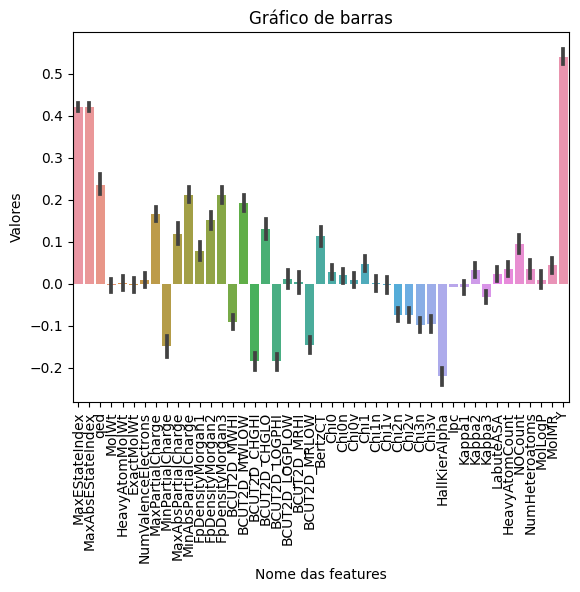

In [69]:
sns.barplot(data=features_final)
plt.title("Gráfico de barras")
plt.xticks(rotation=90)
plt.xlabel("Nome das features")
plt.ylabel("Valores")

Histograma:

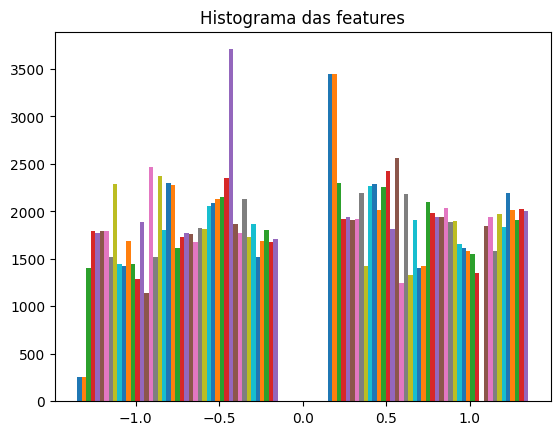

In [73]:
plt.hist(features_final, bins=2)
plt.title('Histograma das features')
plt.show()

Heatmap:

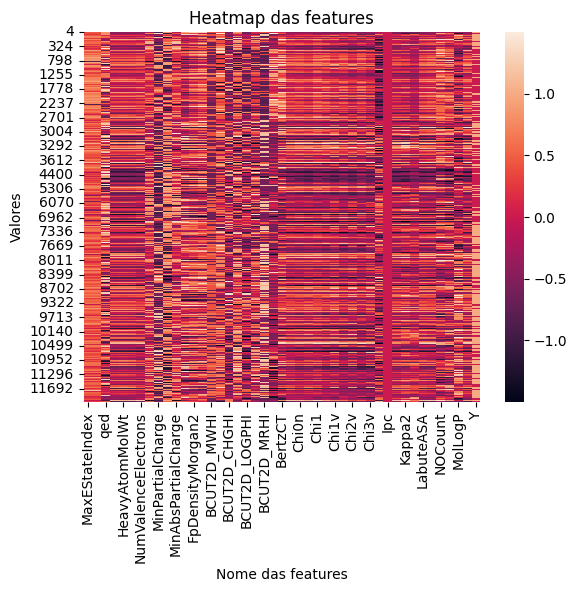

In [75]:
sns.heatmap(features_final)
plt.title("Heatmap das features")
plt.xticks(rotation=90)
plt.xlabel("Nome das features")
plt.ylabel("Valores")
plt.show()

### Análise estatística univariada (e.g. análise de “expressão” diferencial)

Histograma para verificar a normalidade dos dados:

C:\Users\Mariana\AppData\Local\Temp\ipykernel_16672\3528242221.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features_final, kde=True, bins=10)


<AxesSubplot: ylabel='Density'>

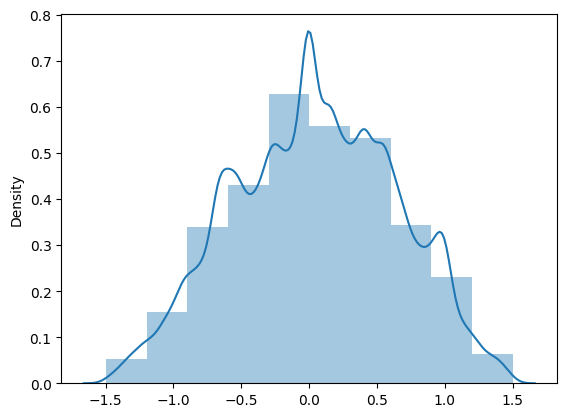

In [76]:
sns.distplot(features_final, kde=True, bins=10)

Com base na análise gráfica, como o histograma apresenta uma curva em forma de sino, sugere que os dados finais seguem uma distribuição normal.

Verificar quais as features mais significativas para esta análise, através de t-test:

In [78]:
# Lista vazia para armazenar os p-values
pvalues = []

# Separar os dados com base nos valores de Y
data_y0 = features_final[features_final['Y'] == 0]
data_y1 = features_final[features_final['Y'] == 1]

# Realizar o teste t para cada coluna
for col in features_final.columns[:-1]:
    t_stat, p_value = ttest_ind(data_y0[col], data_y1[col])
    print(f"{col}: t-statistic = {t_stat:.4f}, p-value = {p_value:.5f}")

# Armazena o p-value na lista
    pvalues.append(p_value)

# Cria uma série com os p-values e os nomes das colunas
pvalues = pd.Series(pvalues, index=features_final.columns[:-1]).sort_values(ascending=True)

# Seleciona as 5 colunas com os menores p-values
colunas_selecionadas = pvalues.nsmallest(5).index.tolist()


MaxEStateIndex: t-statistic = -2.0049, p-value = 0.04505
MaxAbsEStateIndex: t-statistic = -2.0049, p-value = 0.04505
qed: t-statistic = 7.2729, p-value = 0.00000
MolWt: t-statistic = -7.4434, p-value = 0.00000
HeavyAtomMolWt: t-statistic = -7.8369, p-value = 0.00000
ExactMolWt: t-statistic = -7.4017, p-value = 0.00000
NumValenceElectrons: t-statistic = -3.8391, p-value = 0.00013
MaxPartialCharge: t-statistic = 4.0230, p-value = 0.00006
MinPartialCharge: t-statistic = 1.5671, p-value = 0.11718
MaxAbsPartialCharge: t-statistic = -1.5488, p-value = 0.12153
MinAbsPartialCharge: t-statistic = 4.0106, p-value = 0.00006
FpDensityMorgan1: t-statistic = 4.5046, p-value = 0.00001
FpDensityMorgan2: t-statistic = 3.0593, p-value = 0.00223
FpDensityMorgan3: t-statistic = 0.0264, p-value = 0.97896
BCUT2D_MWHI: t-statistic = -11.5618, p-value = 0.00000
BCUT2D_MWLOW: t-statistic = -2.7101, p-value = 0.00676
BCUT2D_CHGHI: t-statistic = 3.1295, p-value = 0.00176
BCUT2D_CHGLO: t-statistic = -5.5568, p-va

C:\Users\Mariana\AppData\Local\Temp\ipykernel_16672\3420950296.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(data_y0[col], data_y1[col])


In [79]:
colunas_selecionadas

['MolLogP', 'BCUT2D_MRHI', 'NOCount', 'BCUT2D_MWHI', 'MolMR']

Com base nos ttest realizados, consegue-se perceber que as features mais significativas para esta análise, ou seja, as que apresentam um p-value menor,são as 'MolLogP', 'BCUT2D_MWHI', 'BCUT2D_MRHI', 'HeavyAtomMolWt' e 'MolMR'. 

MolLogP: corresponde às medidas de log P octanol-água dos compostos químicos a analisar, que indica a hidrofobicidade (solubilidade em água) das moléculas.

BCUT2D_MRHI: representa a massa ponderada hidrofóbica dos anéis aromáticos das moléculas. 

NOCount: número de grupos nitro (-NO2) presentes numa molécula.

BCUT2D_MWHI: representa a massa ponderada hidrofóbica das ligações entre átomos de carbono das moléculas. 

MolMR: corresponde à medida da capacidade das moléculas interagirem com outras moléculas num ambiente químico.

In [80]:
MolLogP = features_final['MolLogP']
BCUT2D_MWHI = features_final['BCUT2D_MWHI']
BCUT2D_MRHI = features_final['BCUT2D_MRHI']
NOCount = features_final['NOCount']
MolMR = features_final['MolMR']

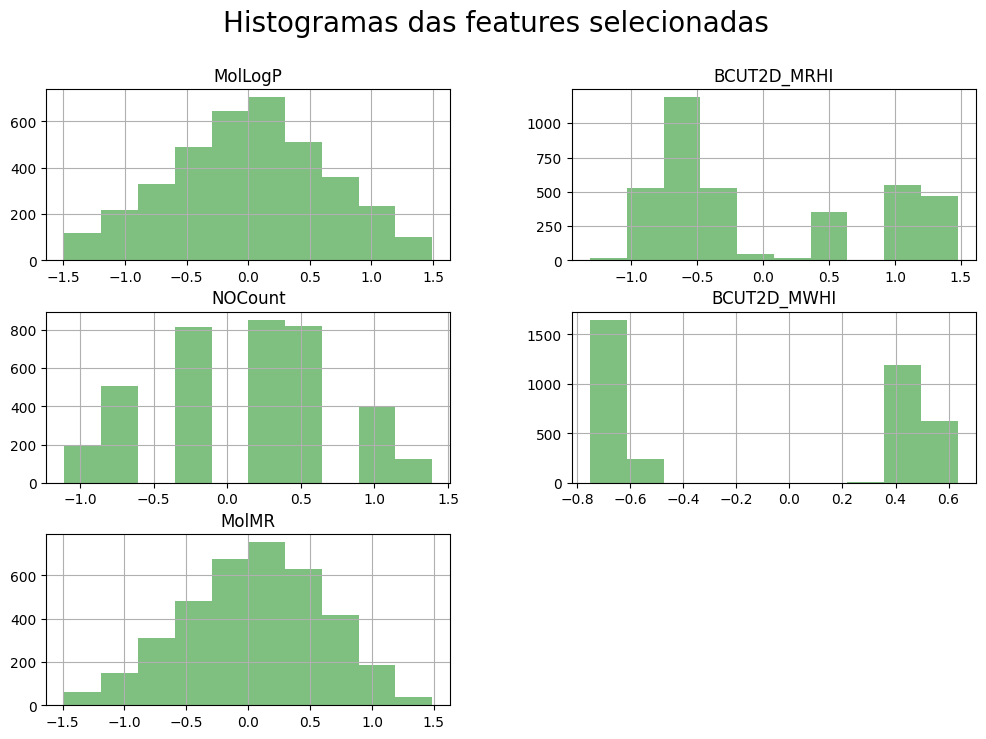

In [81]:
colunas_selecionadas = ['MolLogP', 'BCUT2D_MRHI', 'NOCount','BCUT2D_MWHI', 'MolMR']
features_final[colunas_selecionadas].hist(figsize=(12,8), color = 'green', alpha = 0.5)
plt.suptitle('Histogramas das features selecionadas', fontsize=20)
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

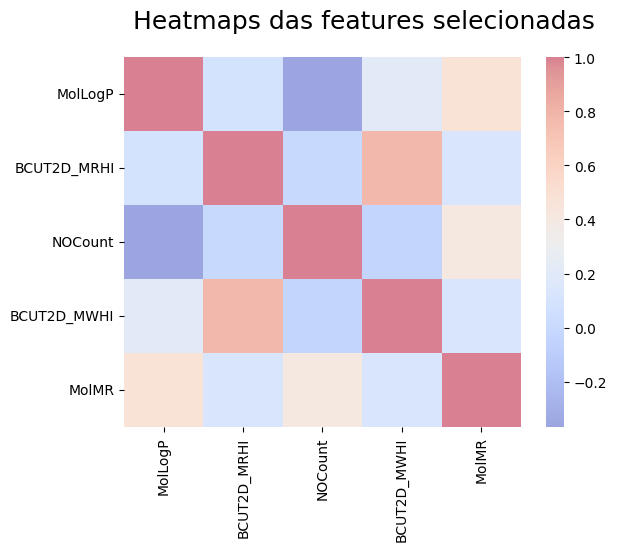

In [82]:
colunas_selecionadas = ['MolLogP', 'BCUT2D_MRHI', 'NOCount','BCUT2D_MWHI', 'MolMR']
sns.heatmap(features_final[colunas_selecionadas].corr(), cmap= 'coolwarm', alpha = 0.5)
plt.suptitle('Heatmaps das features selecionadas', fontsize=18)
plt.show()

Representando a coluna 'Y' uma combinação binária de 0 e 1, esta é útil para prever a inibição do CYP2C19 através das moléculas disponibilizadas. Assim sendo, o valor 0 corresponde à ausência de inibição e 1 corresponde à inibição do CYP2C19. Posto isto, iremos proceder à análise das features mais significativas que correspondem àquelas com p-value menor.

Text(0, 0.5, 'MolLogP')

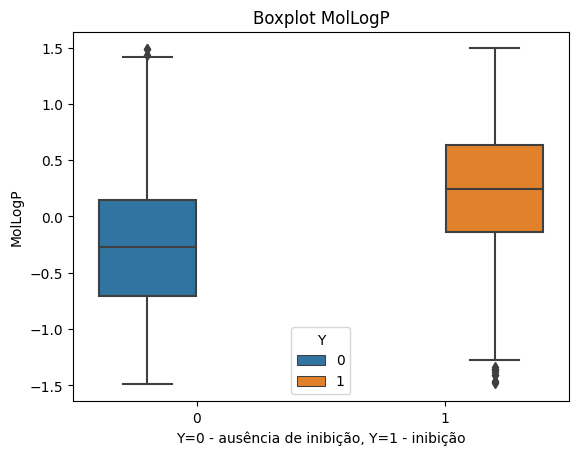

In [83]:
sns.boxplot(data=features_final, x = 'Y', y ='MolLogP', hue = 'Y')
plt.title("Boxplot MolLogP")
plt.xlabel("Y=0 - ausência de inibição, Y=1 - inibição")
plt.ylabel("MolLogP")

Text(0, 0.5, 'BCUT2D_MRHI')

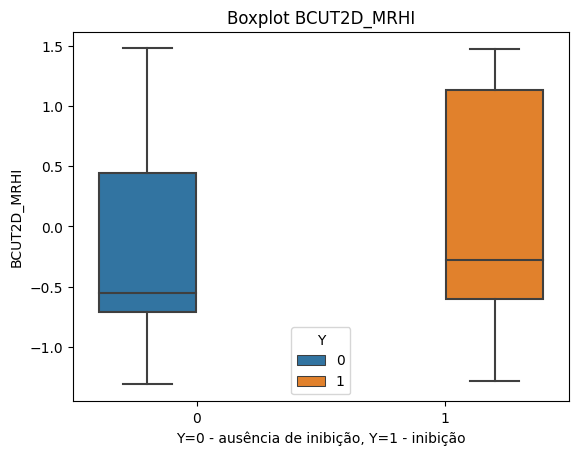

In [84]:
sns.boxplot(data=features_final, x = 'Y', y ='BCUT2D_MRHI', hue = 'Y')
plt.title("Boxplot BCUT2D_MRHI")
plt.xlabel("Y=0 - ausência de inibição, Y=1 - inibição")
plt.ylabel("BCUT2D_MRHI")

Text(0, 0.5, 'NOCount')

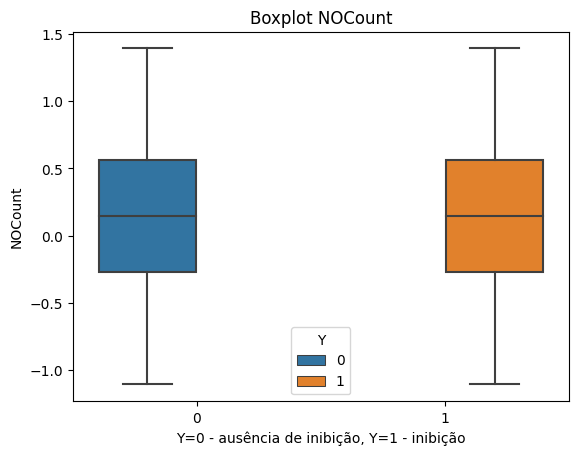

In [85]:
sns.boxplot(data=features_final, x = 'Y', y ='NOCount', hue = 'Y')
plt.title("Boxplot NOCount")
plt.xlabel("Y=0 - ausência de inibição, Y=1 - inibição")
plt.ylabel("NOCount")

Text(0, 0.5, 'BCUT2D_MRHI')

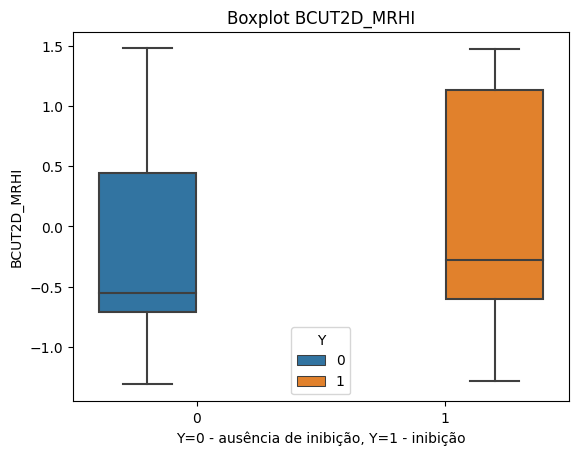

In [86]:
sns.boxplot(data=features_final, x = 'Y', y ='BCUT2D_MRHI', hue = 'Y')
plt.title("Boxplot BCUT2D_MRHI")
plt.xlabel("Y=0 - ausência de inibição, Y=1 - inibição")
plt.ylabel("BCUT2D_MRHI")

Text(0, 0.5, 'MolMR')

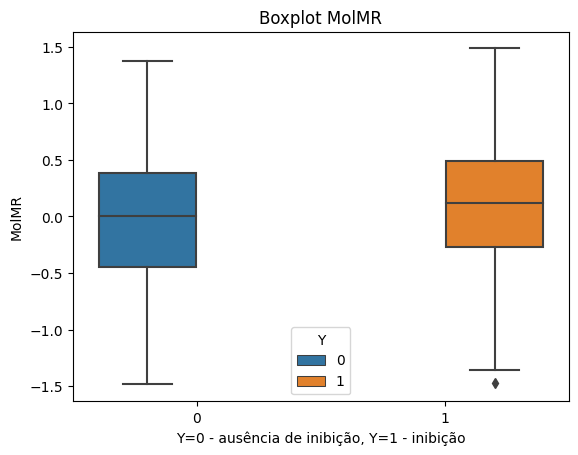

In [87]:
sns.boxplot(data=features_final, x = 'Y', y ='MolMR', hue = 'Y')
plt.title("Boxplot MolMR")
plt.xlabel("Y=0 - ausência de inibição, Y=1 - inibição")
plt.ylabel("MolMR")

Através da análise dos boxplots acima apresentados, conseguimos perceber a distribuição dos valores de cada coluna/feature selecionada, dependendo do valor de Y, se é 0 ou 1. Por exemplo, a feature 'MolLogP' apresenta uma distribuição ligeiramente diferente, então é de prever que esta feature tenha influência na inibição do composto.

### Análise estatística multivariada: clustering, redução de dimensionalidade/ visualização

### PCA

In [88]:
#normalização
features_sig = features_final.iloc[:, :-1]
scaler = StandardScaler()
features_sig_scale = scaler.fit_transform(features_sig)
features_sig_y = features_final

[4.65014661e-01 9.93314428e-02 7.66959606e-02 6.49334321e-02
 5.11655624e-02 4.94954502e-02 4.51591587e-02 3.20986913e-02
 2.69470197e-02 1.99572493e-02 1.19750020e-02 1.05523562e-02
 9.93612639e-03 8.01256217e-03 5.30537695e-03 4.82134292e-03
 3.85641421e-03 3.23646177e-03 2.83180431e-03 2.10922564e-03
 1.78431748e-03 1.29714784e-03 8.75679900e-04 5.78125199e-04
 5.11533274e-04 4.09498463e-04 2.38111067e-04 1.96177364e-04
 1.82964509e-04 1.70852915e-04 9.10281604e-05 8.27059572e-05
 5.41620475e-05 3.86659679e-05 2.97774342e-05 1.90739648e-05
 2.30266420e-06 1.86022428e-06 5.86553497e-07 1.27694660e-07
 3.92403595e-10 3.37069503e-33 2.87995857e-33 2.56612036e-33]


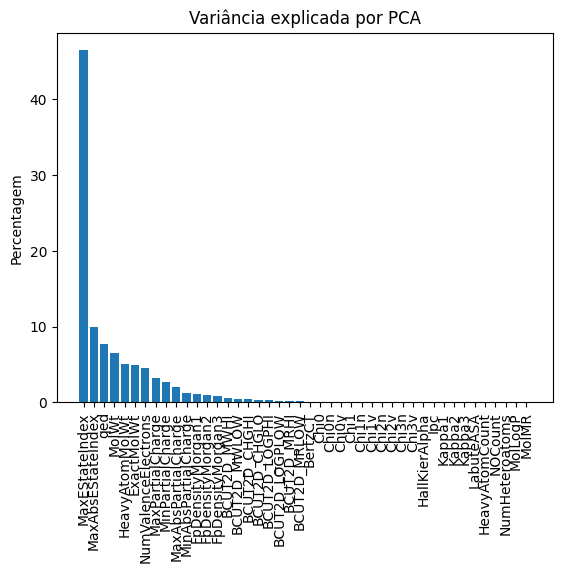

In [93]:
n=44
pca_features = PCA(n_components=n)
pca_features.fit(features_sig_scale)
x_reduced = pca_features.transform(features_sig_scale)


print(pca_features.explained_variance_ratio_)  
plt.bar(range(n), pca_features.explained_variance_ratio_*100)
plt.xticks(range(n), features_sig.columns)
plt.xticks(rotation=90)
plt.title("Variância explicada por PCA")
plt.ylabel("Percentagem")
plt.show()

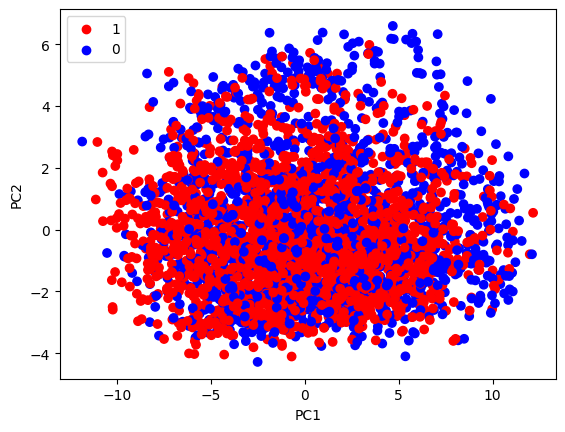

In [94]:
# PCA
pca = PCA()
pca.fit(features_sig_scale)

# dois primeiros PCs
pca_scores = pca.transform(features_sig_scale)[:, :2]

# mapa de cores para o plot
feat_colors = {'1': 'red', '0': 'blue'}
colors = [feat_colors[str(t)] for t in features_sig_y['Y'].astype(str)]

# plot
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], c=colors)
plt.xlabel('PC1')
plt.ylabel('PC2')

# legenda
handles = []
labels = []
for feat_type, color in feat_colors.items():
    handles.append(plt.scatter([], [], c=color))
    labels.append(feat_type)
plt.legend(handles, labels, loc='upper left')

No gráfico PCA, podemos observar que as amostras de cada tipo de feature estão agrupadas em dois clusters sobrepostos, de acordo com o valor de Y correspondente, indicando que têm impacto na inibição e na ausência de inibição do composto (pontos de cores diferentes sobrepostos). O facto de haver uma grande quantidade de sobreposição entre os clusters sugere que existem limites mal definidos na discriminação entre os diferentes tipos de features estudadas.

### Clustering

Para a realização do clustering foram usadas as 5 features com mais variância explicada por PCA, determinadas anteriormente: 'MaxEStateIndex', 'MaxAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt'.

In [96]:
feat_sel_pca = features_final[['MaxEStateIndex', 'MaxAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt']]
scaler = StandardScaler()
feat_sel_pca_scale = scaler.fit_transform(feat_sel_pca)
feat_sel_pca_y = pd.concat([feat_sel_pca, features_final['Y']], axis=1)

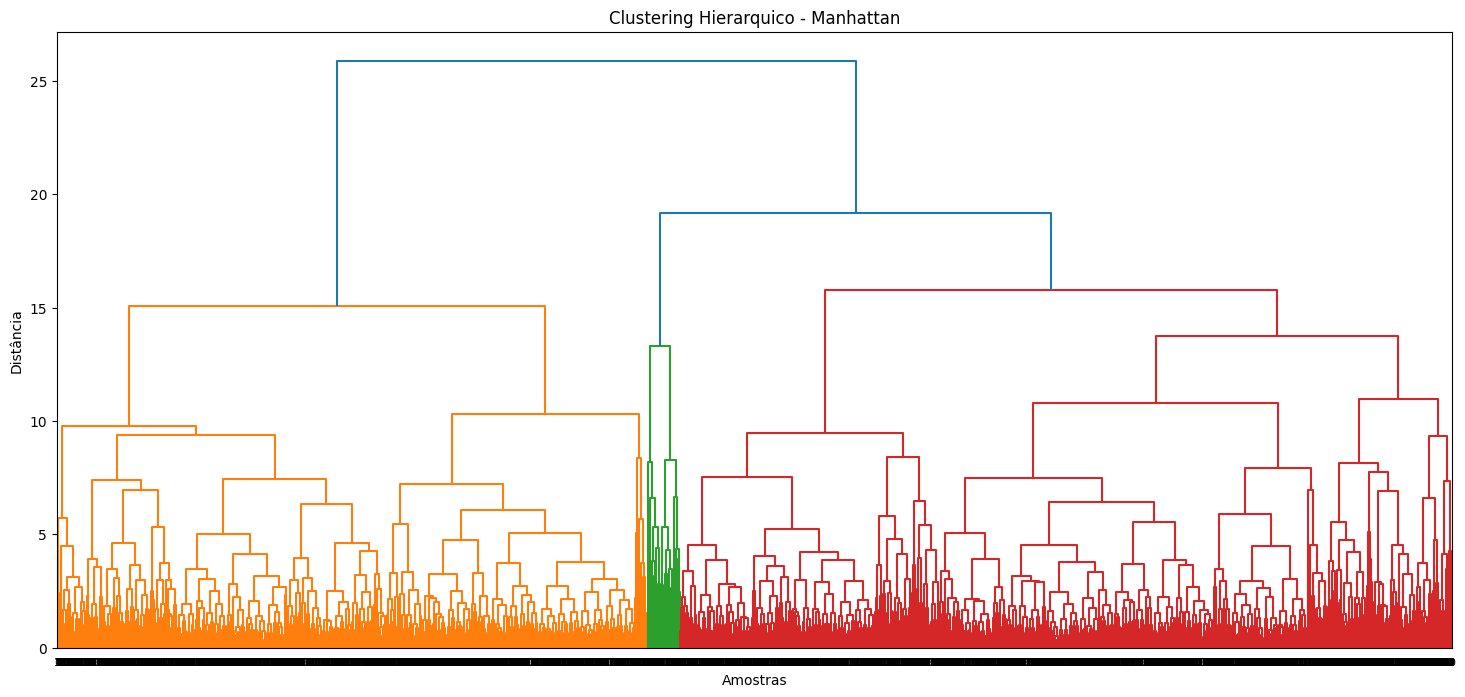

In [99]:
# Clustering hierárquico usando as 5 features com mais variância explicada por PCA
# Clustering hierárquico com distância de manhattan 
Z = linkage(feat_sel_pca_scale, method='complete', metric='cityblock')

# dendograma
plt.figure(figsize=(18, 8))
dendrogram(Z, 
           labels=feat_sel_pca_y['Y'].values, 
           orientation='top', 
           leaf_font_size=8)

# mapa de cores
feat_colors = {'MaxEStateIndex': 'red', 'MaxAbsEStateIndex': 'blue', 'qed': 'green', 'MolWt': 'yellow', 'HeavyAtomMolWt': 'orange'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(feat_colors.get(lbl.get_text(), 'black')) #usa a cor preto para cores desconhecidas
    lbl.set_rotation(0) 

plt.title('Clustering Hierarquico - Manhattan')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

Fazendo o clustering hierárquico, regista-se um agrupamento das features selecionadas. Comparativamente ao plot PCA, verificamos que também neste caso existe uma sobreposição de amostras de classes diferentes. 
Podemos identificar grupos de amostras que estão próximas umas das outras no dendrograma, indicando que têm características semelhantes com base nas features selecionadas, por exemplo, as features 'MaxEStateIndex' e 'qed' estão próximas, apresentando uma menor distância entre si, comparativamente às restantes. Grupos próximos no dendrograma podem representar clusters de amostras com propriedades similares.
Os clusters são mesclados em alturas diferentes, o que indica a proximidade ou distância entre eles. Podemos observar a formação de grupos maiores e grupos menores conforme os clusters são mesclados, ou seja, a feature 'MaxAbsEStateIndex' apresenta maior distância em relação às restantes.

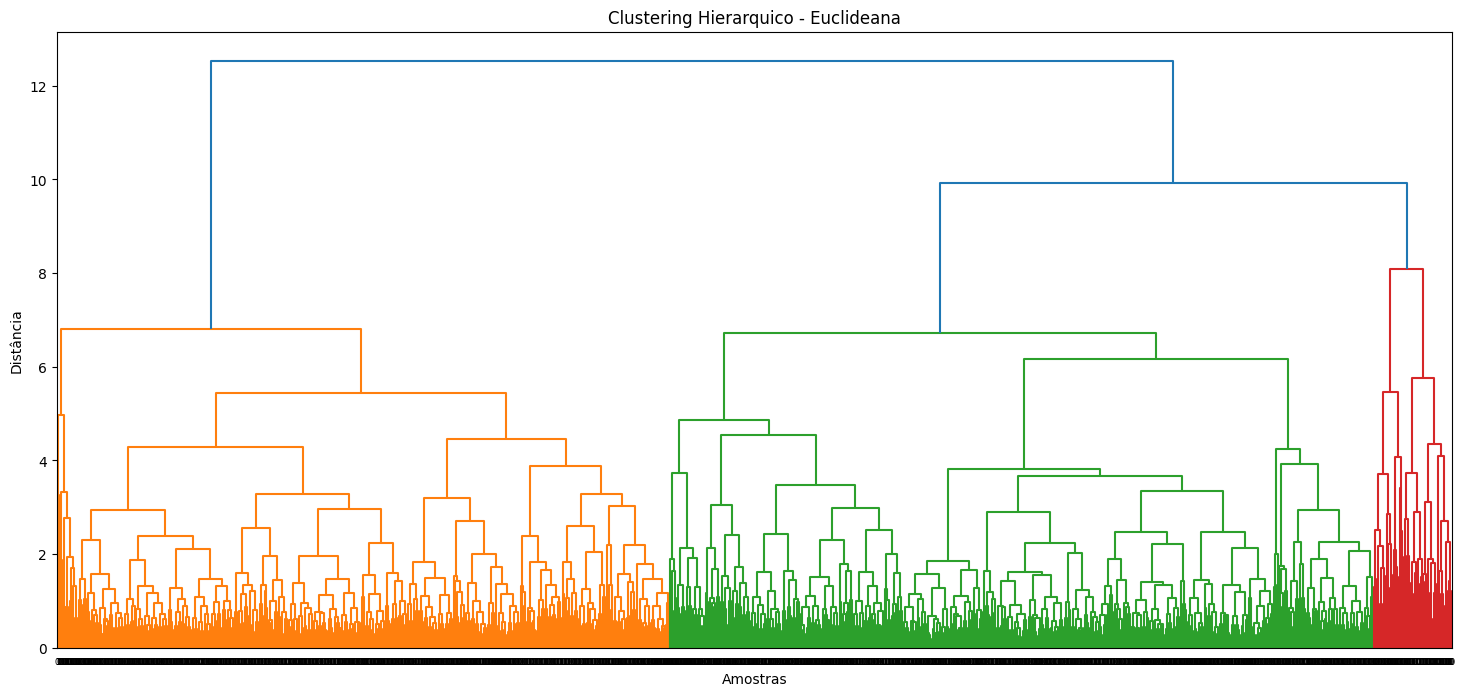

In [100]:
# Clustering hierárquico usando as 5 features com mais variância explicada por PCA
# Clustering hierárquico com distância euclideana
Z = linkage(feat_sel_pca_scale, method='complete', metric='euclidean')

# dendograma
plt.figure(figsize=(18, 8))
dendrogram(Z, 
           labels=feat_sel_pca_y['Y'].values, 
           orientation='top', 
           leaf_font_size=6)

# mapa de cores
feat_colors = {'MaxEStateIndex': 'red', 'MaxAbsEStateIndex': 'blue', 'qed': 'green', 'MolWt': 'yellow', 'HeavyAtomMolWt': 'orange'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(feat_colors.get(lbl.get_text(), 'black')) #usa a cor preto para cores desconhecidas
    lbl.set_rotation(0) 

plt.title('Clustering Hierarquico - Euclideana')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

Fazendo uma comparação com o clustering através da distância euclideana, podemos observar que o resultado é semelhante. Continua a haver alguma sobreposição entre as classes. 
Neste caso, podemos identificar grupos de amostras que estão próximas umas das outras no dendrograma, indicando que têm características semelhantes com base nas features selecionadas, por exemplo, as features 'MaxEStateIndex' e 'qed' estão próximas, apresentando uma menor distância entre si, comparativamente às restantes. Grupos próximos no dendrograma podem representar clusters de amostras com propriedades similares. Estas features podem partilhar características.
Os clusters são mesclados em alturas diferentes, o que indica a proximidade ou distância entre eles. Podemos observar a formação de grupos maiores e grupos menores conforme os clusters são mesclados, ou seja, a feature 'MaxAbsEStateIndex' apresenta maior distância em relação às restantes. 

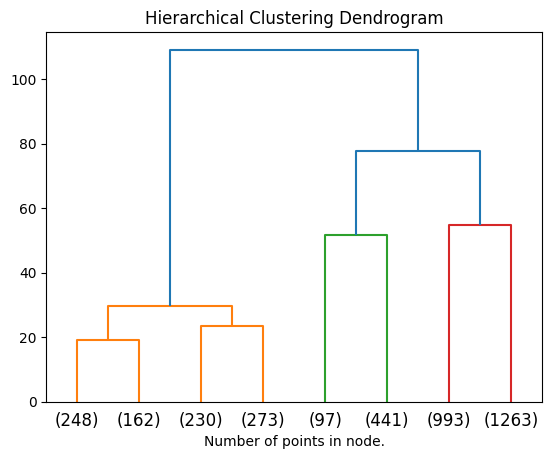

In [102]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



X = feat_sel_pca_scale

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=2)
plt.xlabel("Number of points in node.")
plt.show()


Em cima, é apresentado um dendrograma com um único cluster hierárquico que contém todas as amostras. 

In [144]:
# k-means clustering
kmeans = KMeans(n_clusters=2, max_iter=1000)
kmeans.fit(features_sig_scale)
labels_k = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels_k,features_sig_y['Y'], rownames=['clusters'] )

c:\Users\Mariana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Y,0,1
clusters,,
0,814,876
1,891,1126


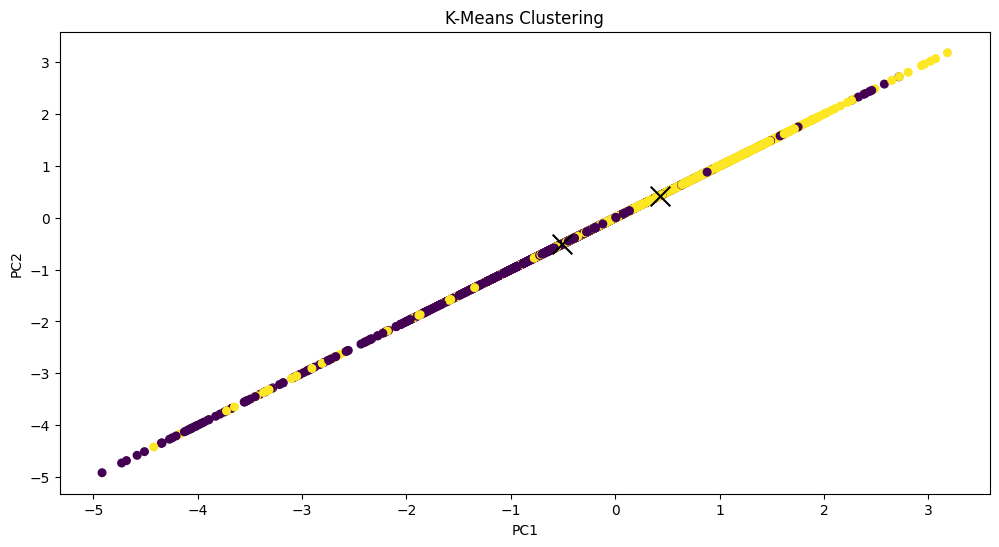

In [145]:
# plot 
plt.figure(figsize=(12, 6))
plt.scatter(features_sig_scale[:, 0], features_sig_scale[:, 1], c=labels_k, s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.show()

Comparativamente ao PCA e ao clustering hierárquico, o clustering k-means apresenta uma menor definição de classes. Há alguma dispersão face aos dois centróides.


### Referências bibliográficas

[1] Veith, Henrike et al. “Comprehensive characterization of cytochrome P450 isozyme selectivity across chemical libraries.” Nature biotechnology vol. 27,11 (2009): 1050-5.
[2] Desta, Z., Zhao, X., Shin, JG. et al. Clinical Significance of the Cytochrome P450 2C19 Genetic Polymorphism. Clin Pharmacokinet 41, 913–958 (2002). https://doi.org/10.2165/00003088-200241120-00002